# 1. Prepare data

In [1]:
# Add matlab path before starting notebook in bash if you have problems with matlab
# export PATH=/mnt/d/Matlab2017a/bin:$PATH

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams.update({'font.size':20})

import spikeinterface.extractors as se
import spikeinterface.widgets as sw
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
#from spikeextractors.extractors.axonaunitrecordingextractor import AxonaUnitRecordingExtractor

print(sys.version, sys.platform, sys.executable)

13:43:12 [I] klustakwik KlustaKwik2 version git-90568916-dirty


3.8.2 (default, Apr 27 2020, 15:53:34) 
[GCC 9.3.0] linux /mnt/d/spikeinterface/hussaini-to-nwb/venv/bin/python3


In [ ]:
# This can be used to load the example data from gin (only 200ms long though!)
# This dowenloads html instead of the data...?!?!
'''
from urllib.request import urlopen

url_for_tests = r'https://gin.g-node.org/NeuralEnsemble/ephy_testing_data/src/master/axona'
localdir = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw'
base_filename = 'axona_raw'

distantfile = os.path.join(url_for_tests, base_filename)
localfile = os.path.join(localdir, base_filename)

for suffix in ['.bin', '.set']:
    dist = urlopen(distantfile + suffix)
    with open(localfile + suffix, 'wb') as f:
        f.write(dist.read())
'''

In [ ]:
# Use 20201004_Raw if you want to have more data (useful for spikesorting!) - this is ~10 min

import os

dir_name = r'../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw'
base_filename = '20201004_Raw'  #'axona_raw'
filename = os.path.join(dir_name, base_filename)

In [5]:
# Create axona recording extractor object

axo_cont = se.AxonaRecordingExtractor(filename=filename)

In [6]:
# Some general information about the recording

recording = axo_cont

print('Channel ids: {}'.format(recording.get_channel_ids()))
print('Num. channels = {}'.format(len(recording.get_channel_ids())))
print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
print('Num. samples = {}'.format(recording.get_num_frames()))
print('Stdev. on third channel = {}'.format(np.std(axo_cont.get_traces(
    start_frame=1000000, end_frame=1001000, channel_ids=2))))
print('Location of third electrode = {}'.format(recording.get_channel_property(channel_id=2, property_name='location')))

Channel ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Num. channels = 16
Sampling frequency = 48000.0 Hz
Num. samples = 28800300
Stdev. on third channel = 6466.5625
Location of third electrode = [nan nan]


/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

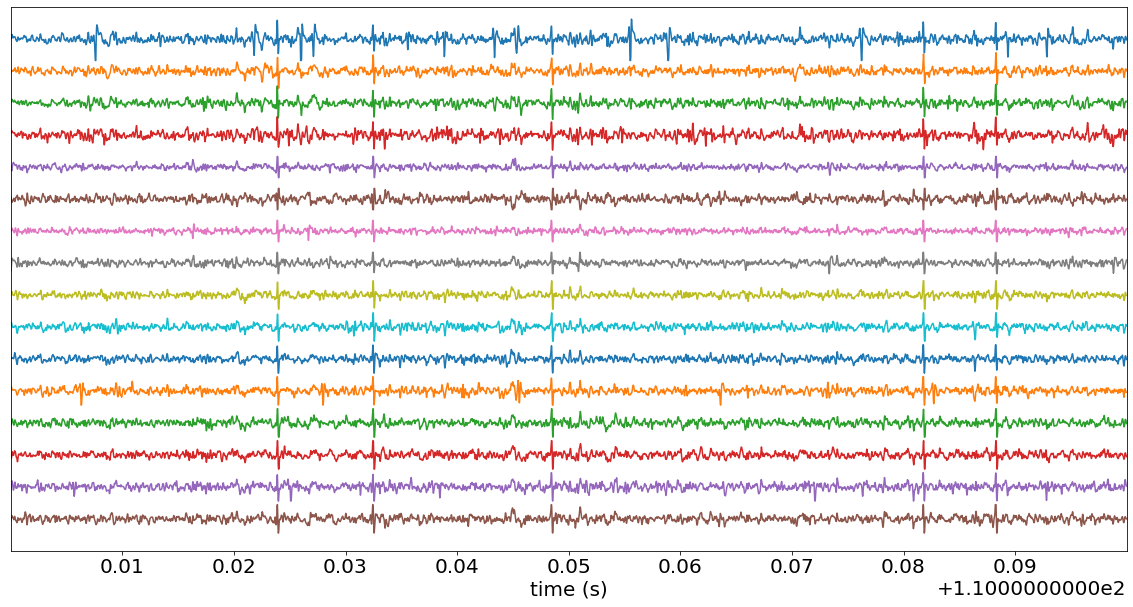

In [7]:
# Plot channels in time domain

w_ts = sw.plot_timeseries(recording, trange=[110, 110.1])

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is

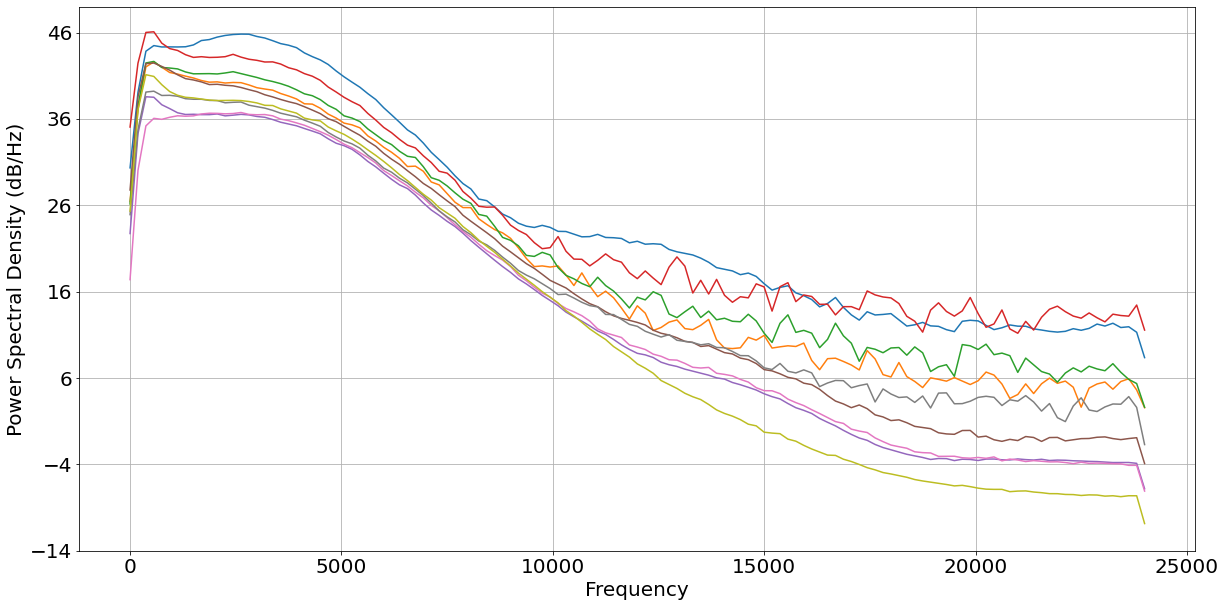

In [8]:
# Plot channels in frequency domain

w_sp = sw.plot_spectrum(recording, trange=[0, 10], channels=[0, 1, 2, 3, 4, 5, 6, 7, 8])

In [9]:
# Do we already have channels groups (there should be 4 channels per tetrode)
# It does not seem that spikeextractors likes multiple streams from neo: 
# https://github.com/catalystneuro/spikeextractors/blob/axonaextractor/spikeextractors/extractors/neoextractors/neobaseextractor.py
# But maybe we can already assign groups in neo? Otherwise we can also do this in spikeextractors I suppose. 

print(f'Channel groups: {recording.get_channel_groups()}')

Channel groups: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
recording.set_channel_groups([i//4 for i in range(len(recording.get_channel_ids()))])

print(f'Channel groups: {recording.get_channel_groups()}')

Channel groups: [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]


Some spike sorters (e.g. ironclust) require channel locations. So we will create a fake geometry keeping electrodes on single tetrodes close together. In the tutorials this is done with a .prb file containing a json dictionary like the one below.

In [11]:
# This is copy pasted into a .prb file called channel_groups.prb
channel_groups = {
    0: {
        'channels': [0, 1, 2, 3],
        'geometry': [[0, 0], [1, 0], [2, 0], [3, 0]],
    },
    1: {
        'channels': [4, 5, 6, 7],
        'geometry': [[6, 0], [7, 0], [8, 0], [9, 0]],
    },
    2: {
        'channels': [8, 9, 10, 11],
        'geometry': [[12, 0], [13, 0], [14, 0], [15, 0]],
    },
    3: {
        'channels': [12, 13, 14, 15],
        'geometry': [[18, 0], [19, 0], [20, 0], [21, 0]],
    }
}

In [12]:
recording_prb = recording.load_probe_file(os.path.join(dir_name, 'channel_groups.prb'))
print('Channel ids:', recording_prb.get_channel_ids())
print('Loaded properties', recording_prb.get_shared_channel_property_names())

# 'group' and 'location' can be returned as lists:
print(recording_prb.get_channel_groups())
print(recording_prb.get_channel_locations())

Channel ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Loaded properties ['gain', 'group', 'location', 'name', 'offset']
[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[[ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 3.  0.]
 [ 6.  0.]
 [ 7.  0.]
 [ 8.  0.]
 [ 9.  0.]
 [12.  0.]
 [13.  0.]
 [14.  0.]
 [15.  0.]
 [18.  0.]
 [19.  0.]
 [20.  0.]
 [21.  0.]]


/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

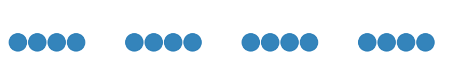

In [13]:
# Show electrode geometry
fh = plt.figure(figsize=(8,1))

w_elec = sw.plot_electrode_geometry(recording_prb, figure=fh)

In [14]:
print('Shared channel property names')
print(recording.get_shared_channel_property_names())

Shared channel property names
['gain', 'group', 'name', 'offset']


# 2. Preprocessing

### Bandpass filter

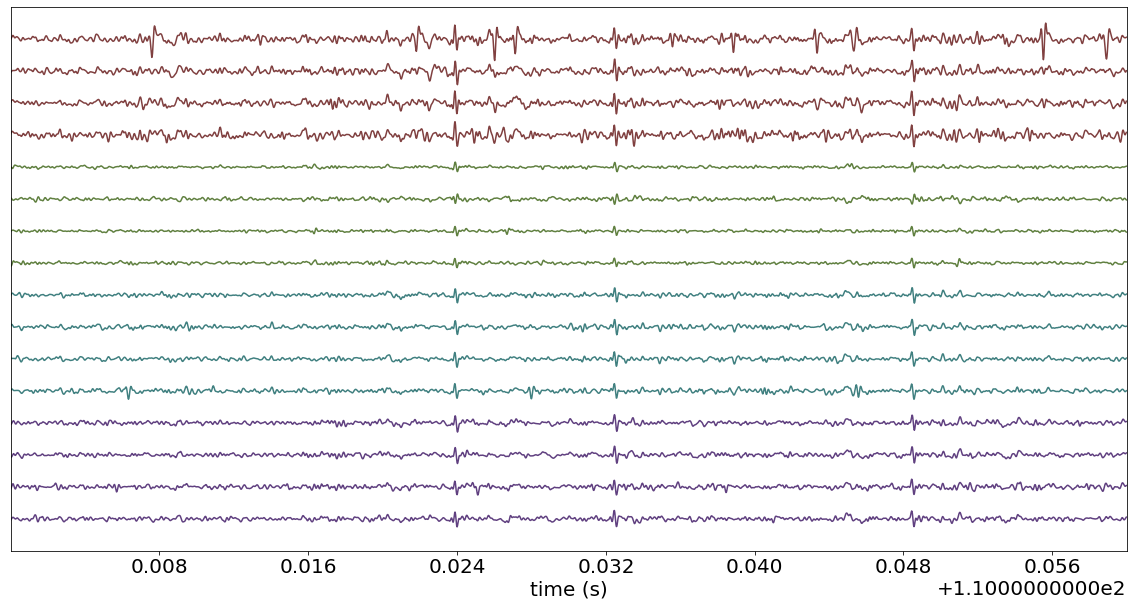

In [15]:
r_filt = st.preprocessing.bandpass_filter(recording_prb, freq_min=300, freq_max=6000)

w = sw.plot_timeseries(r_filt, trange=[110, 110.06], color_groups=True)

I do not see any reason to delete a channel for now, although all channels from the first tetrode, especially the first channel appear to be somewhat noisier than the rest.

### Common median reference (CMR)

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is

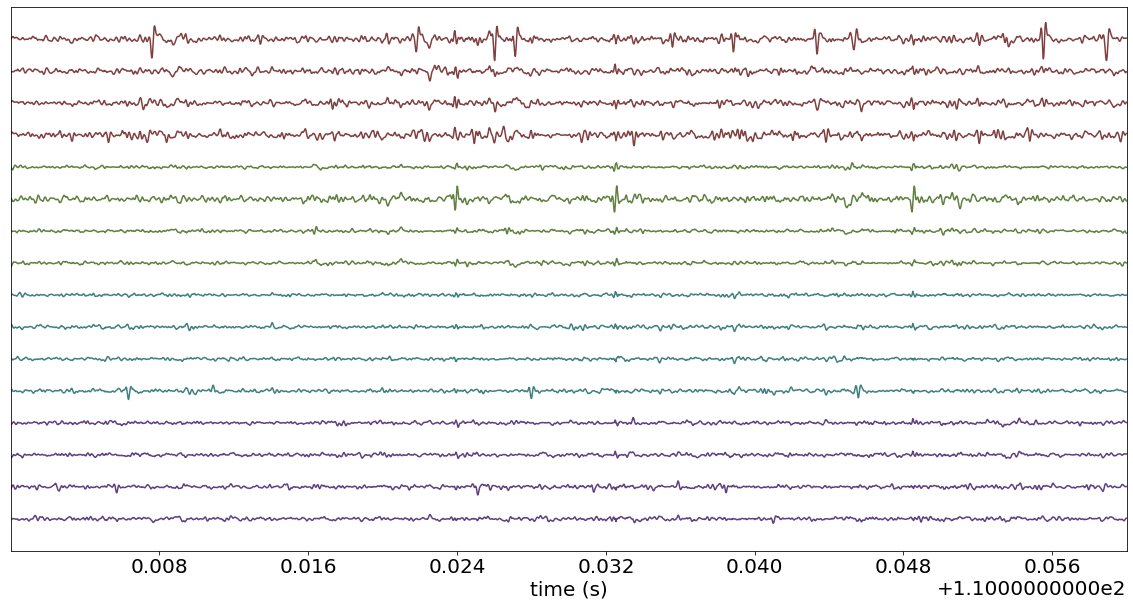

In [16]:
r_cmr = st.preprocessing.common_reference(r_filt, reference='median')

w = sw.plot_timeseries(r_cmr, trange=[110, 110.06], color_groups=True)

This doesn't change much, because as you can see in the data before rereferencing, the spikes are seen in all channels, so rereferencing to median is going to attentuate them all...

Hmm, for the second channel on the second tetrode the "common spikes" are actually inverted, making them even stronger after median referencing. What is going on?

In [17]:
# Select only subset of recording for speed's sake (10 seconds)

fs = r_cmr.get_sampling_frequency()
r_sub = se.SubRecordingExtractor(r_cmr, start_frame=100*fs, end_frame=110*fs)

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is

# 3. Cache data

In [18]:
# Create a binary file to cache data

perma_cache_filename = os.path.join(dir_name, 'cached_data_preproc.dat') 
r_cache = se.CacheRecordingExtractor(r_sub, save_path = perma_cache_filename)

In [19]:
print(r_cache.filename)

../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/cached_data_preproc.dat


In [20]:
# Save corresponding extractor state to be able to read binary data after closing session

r_cache.dump_to_pickle(os.path.join(dir_name, 'cached_data_preproc.pkl'))

In [5]:
# Load cached state to continue session

r_cache = se.load_extractor_from_pickle(os.path.join(dir_name, 'cached_data_preproc.pkl'))

In [6]:
print('duration of recording in seconds: {}'.format(r_cache.get_num_frames() / r_cache.get_sampling_frequency()))

duration of recording in seconds: 10.0


# 4. Spike sorting

Focus on the following spike sorters:

The kilosorts, ironclust, spyking circus, mountainsort.

In [24]:
# Show installed spike sorting algorithms

ss.installed_sorters()

['herdingspikes', 'klusta', 'mountainsort4', 'spykingcircus']

In [25]:
ss.get_default_params('klusta')

{'adjacency_radius': None,
 'threshold_strong_std_factor': 5,
 'threshold_weak_std_factor': 2,
 'detect_sign': -1,
 'extract_s_before': 16,
 'extract_s_after': 32,
 'n_features_per_channel': 3,
 'pca_n_waveforms_max': 10000,
 'num_starting_clusters': 50,
 'chunk_mb': 500,
 'n_jobs_bin': 1}

In [26]:
ss.get_params_description('klusta')

{'adjacency_radius': 'Radius in um to build channel neighborhood ',
 'threshold_strong_std_factor': 'Strong threshold for spike detection',
 'threshold_weak_std_factor': 'Weak threshold for spike detection',
 'detect_sign': 'Use -1 (negative), 1 (positive) or 0 (both) depending on the sign of the spikes in the recording',
 'extract_s_before': 'Number of samples to cut out before the peak',
 'extract_s_after': 'Number of samples to cut out after the peak',
 'n_features_per_channel': 'Number of PCA features per channel',
 'pca_n_waveforms_max': 'Maximum number of waveforms for PCA',
 'num_starting_clusters': 'Number of initial clusters',
 'chunk_mb': 'Chunk size in Mb for saving to binary format (default 500Mb)',
 'n_jobs_bin': 'Number of jobs for saving to binary format (Default 1)'}

In [149]:
ss.run_sorter?

In [150]:
ss.run_klusta?

### Klusta

In [27]:
# run spike sorting on 10s of recording

sorting_KL_all = ss.run_klusta(
    r_cache, 
    output_folder=os.path.join(dir_name, 'klusta_10s'), 
    adjacency_radius=50, 
    verbose=True
)
print('Found', len(sorting_KL_all.get_unit_ids()), 'units')

WARNING! The recording contains several group. In order to spike sort by 'group' use grouping_property='group' as argument.


/mnt/d/spikeinterface/spikeextractors/spikeextractors/baseextractor.py:607: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif isinstance(v, (np.int, np.int32, np.int64)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/baseextractor.py:609: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guida

RUNNING SHELL SCRIPT: /mnt/d/spikeinterface/hussaini-to-nwb/../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/klusta_10s/run_klusta.sh
12:28:18 [I] creator:446          Using kwik file `/mnt/d/freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/klusta_10s/recording.kwik`.

12:28:19 [I] launch:206           Starting spike detection.

12:28:19 [I] launch:53            SpikeDetekt parameters:

12:28:19 [I] launch:55            chunk_overlap_seconds = 0.015

12:28:19 [I] launch:55            chunk_size_seconds = 3

12:28:19 [I] launch:55            connected_component_join_size = 1

12:28:19 [I] launch:55            detect_spikes = negative

12:28:19 [I] launch:55            dtype = <f4

12:28:19 [I] launch:55            excerpt_size_seconds = 1

12:28:19 [I] launch:55            experiment_name = recording.kwik

12:28:19 [I] launch:55            extract_s_after = 32

12:28:19 [I] launch:55            extract_s_before = 16

12:28:19 [I] launch:55      

KeyboardInterrupt: 

In [125]:
# run spike sorting by group (=tetrode)

sorting_KL = ss.run_klusta(
    r_cache, 
    adjacency_radius=50, 
    output_folder=os.path.join(dir_name, 'klusta_10s_by_group'), 
    grouping_property='group', 
    parallel=True
)
print(f'Klusta found {len(sorting_KL.get_unit_ids())} units')

Klusta found 24 units


Hm, interesting, sorting for each tetrode separately yielded more units.

In [126]:
print(f'Klusta unit ids: {sorting_KL.get_unit_ids()}')

Klusta unit ids: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [127]:
print(f'Spike train of a unit: {sorting_KL.get_unit_spike_train(1)}')

Spike train of a unit: [  5169   7133  14929  22194  28803  33676  44279  46563  47483  47784
  55374  63412  65222  65839  76089  89378  90866  91185  96914  98452
 100145 102884 105006 105309 108187 109146 110588 110773 114339 114822
 115394 118442 121372 121885 123669 129130 137151 146218 150390 151388
 171017 178791 179624 179957 181754 184281 210518 211998 214060 222591
 228370 228891 229124 235676 237420 240689 245397 246152 248226 248360
 250939 254000 257530 258888 259574 260233 260743 269428 271792 272722
 275346 282130 288947 293763 302343 304486 304594 307374 314822 317805
 318102 330733 336374 340884 346997 377779 378466 379218 379285 384872
 386035 388278 391009 392802 399570 545378 548813 550172 553325 555933
 558347 561993 564092 564324 565595 565642 575393 583844 596825 596871
 597849 597895 602676 602982 603700 604006 605645 606036 606669 607060
 618518 619542 621529 622553 651073 651422 653887 659937 661316 664430
 664449 665322 673883 675298 675573 677003 680999 6823

/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

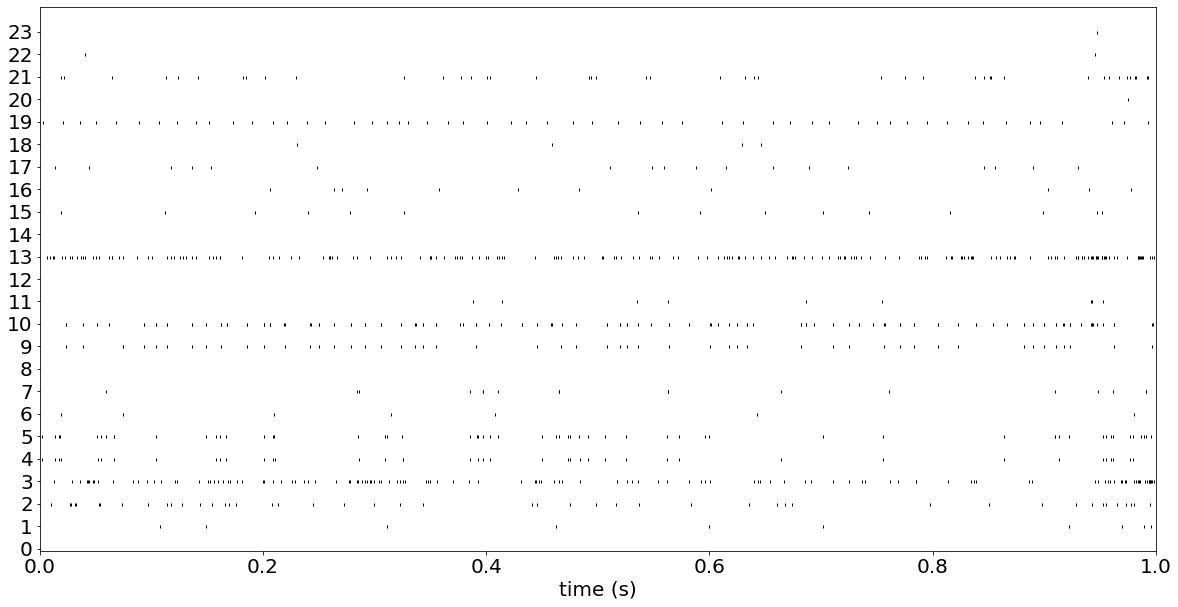

In [128]:
w_rs = sw.plot_rasters(sorting_KL, trange=[0,1])

In [129]:
# Reloading spike sorting output (note that if sorting by group or property they need to be loaded in separately)

sorting_KL_grp = {}
for i in range(0, 4):
    sorting_KL_grp[i] = se.KlustaSortingExtractor(os.path.join(dir_name, 'klusta_20s_by_group', str(i)))

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
sorting_KL_grp

{0: <spikeextractors.extractors.klustaextractors.klustaextractors.KlustaSortingExtractor at 0x7f82680f3af0>,
 1: <spikeextractors.extractors.klustaextractors.klustaextractors.KlustaSortingExtractor at 0x7f8268a938b0>,
 2: <spikeextractors.extractors.klustaextractors.klustaextractors.KlustaSortingExtractor at 0x7f8268b32ca0>,
 3: <spikeextractors.extractors.klustaextractors.klustaextractors.KlustaSortingExtractor at 0x7f83b05a43d0>}

In [131]:
print(f'Klusta unit ids group 0: {sorting_KL_grp[0].get_unit_ids()}')

Klusta unit ids group 0: [0, 2, 3, 4, 5, 6, 7, 8, 9]


### Ironclust

In [7]:
# Set ironclust path (ironclust uses Matlab)

ss.IronClustSorter.set_ironclust_path('../specific_spikesorters/ironclust')
ss.IronClustSorter.ironclust_path

Setting IRONCLUST_PATH environment variable for subprocess calls to: /mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/ironclust


'/mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/ironclust'

In [8]:
ss.installed_sorters()

['herdingspikes', 'ironclust', 'klusta', 'mountainsort4', 'spykingcircus']

In [9]:
# run spike sorting by group 
sorting_IC = ss.run_ironclust(
    r_cache, 
    os.path.join(dir_name, 'ironclust_group'), 
    grouping_property='group', 
    parallel=True, 
    verbose=True
)
print(f'IronClust found {len(sorting_IC.get_unit_ids())} units')

/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

ironclust run time 111.39s
IronClust found 6 units


### Mountainsort4

In [10]:
# Takes very, very long, why?! It breaks: "cannot find context for loky"

In [7]:
ss.get_default_params('mountainsort4')

{'detect_sign': -1,
 'adjacency_radius': -1,
 'freq_min': 300,
 'freq_max': 6000,
 'filter': True,
 'whiten': True,
 'curation': False,
 'num_workers': None,
 'clip_size': 50,
 'detect_threshold': 3,
 'detect_interval': 10,
 'noise_overlap_threshold': 0.15}

In [8]:
ss.get_params_description('mountainsort4')

{'detect_sign': 'Use -1 (negative) or 1 (positive) depending on the sign of the spikes in the recording',
 'adjacency_radius': 'Radius in um to build channel neighborhood (Use -1 to include all channels in every neighborhood)',
 'freq_min': 'High-pass filter cutoff frequency',
 'freq_max': 'Low-pass filter cutoff frequency',
 'filter': 'Enable or disable filter',
 'whiten': 'Enable or disable whitening',
 'curation': 'Enable or disable curation',
 'num_workers': 'Number of workers (if None, half of the cpu number is used)',
 'clip_size': 'Number of samples per waveform',
 'detect_threshold': 'Threshold for spike detection',
 'detect_interval': 'Minimum number of timepoints between events detected on the same channel',
 'noise_overlap_threshold': 'Noise overlap threshold for automatic curation'}

In [10]:
# run spike sorting by group
sorting_MS4 = ss.run_mountainsort4(
    r_cache,
    os.path.join(dir_name, 'mountainsort4_group'),
    grouping_property='group',
    parallel=True,
    verbose=True
)
print(f'Mountainsort4 found {len(sorting_MS4.get_unit_ids())} units')

KeyboardInterrupt: 

In [ ]:
print(f'Spike train of a unit: {sorting_MS4.get_unit_spike_train(1)}')

### Tridesclous

In [31]:
# Pip install failed...

In [40]:
# run spike sorting by group
sorting_TRI = ss.run_tridesclous(
    r_cache, 
    os.path.join(dir_name, 'tridescluous_group'), 
    grouping_property='group', 
    parallel=True, 
    verbose=True
)
print(f'Tridesclous found {len(sorting_TRI.get_unit_ids())} units')

AssertionError: The sorter tridesclous is not installed.
        Please install it with:  

To use Tridesclous run:

       >>> pip install tridesclous

    More information on tridesclous at:
      * https://github.com/tridesclous/tridesclous
      * https://tridesclous.readthedocs.io
     

### Combinato

In [33]:
ss.CombinatoSorter.set_combinato_path('../specific_spikesorters/combinato')

Setting COMBINATO_PATH environment variable for subprocess calls to: /mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/combinato


In [34]:
# run spike sorting by group
sorting_Combi = ss.run_combinato(
    r_cache, 
    os.path.join(dir_name, 'combinato_group'), 
    grouping_property='group', 
    parallel=True, 
    verbose=True
)
print(f'Combinato found {len(sorting_Combi.get_unit_ids())} units')

WARNING! No channel location given. Add dummy location.
WARNING! No channel location given. Add dummy location.
WARNING! No channel location given. Add dummy location.
WARNING! No channel location given. Add dummy location.


SpikeSortingError: Spike sorting failed: [Errno 8] Exec format error: '/mnt/d/spikeinterface/hussaini-to-nwb/../../freelance-work/catalyst-neuro/hussaini-lab-to-nwb/example_data_raw/combinato_group/0/run_combinato.sh'. You can inspect the runtime trace in the combinato.log of the output folder.'

### Herdingspikes2

In [ ]:
# TODO ...

### HDSort

In [36]:
# Add repository path to spikesorters object

ss.HDSortSorter.set_hdsort_path('../specific_spikesorters/HDsort')
ss.HDSortSorter.hdsort_path

Setting HDSORT_PATH environment variable for subprocess calls to: ../specific_spikesorters/HDsort


'/mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/HDsort'

### Kilosort

In [40]:
# Add repository path to spikesorters object

ss.KilosortSorter.set_kilosort_path('../specific_spikesorters/KiloSort')
ss.KilosortSorter.kilosort_path

Setting KILOSORT_PATH environment variable for subprocess calls to: /mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/KiloSort


'/mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/KiloSort'

### Kilosort2

In [42]:
# Add repository path to spikesorters object

ss.Kilosort2Sorter.set_kilosort2_path('../specific_spikesorters/Kilosort2')
ss.Kilosort2Sorter.kilosort2_path

Setting KILOSORT2_PATH environment variable for subprocess calls to: /mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/Kilosort2


'/mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/Kilosort2'

### Kilosort2.5

In [47]:
# Add repository path to spikesorters object
# WRONG ATTRIBUTE... what's the right one?!

ss.Kilosort2_5Sorter.set_kilosort2_path('../specific_spikesorters/kilosort25/kilosort')
ss.Kilosort2_5Sorter?

AttributeError: type object 'Kilosort2_5Sorter' has no attribute 'set_kilosort2_path'

### SpykingCircus

In [ ]:
# TODO ...


### Waveclus

In [49]:
# Add repository path to spikesorters object

ss.WaveClusSorter.set_waveclus_path('../specific_spikesorters/wave_clus')
ss.WaveClusSorter.waveclus_path

Setting WAVECLUS_PATH environment variable for subprocess calls to: /mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/wave_clus


'/mnt/d/spikeinterface/hussaini-to-nwb/../specific_spikesorters/wave_clus'

# 5. Postprocessing

The `postprocessing` submodule of `spiketoolkit` allow us to extract information from the combination of the recording and sorting extractors. For example, we can extract waveforms, templates, maximum channels and pca scores. In addition, we can also compute waveform features that could be used for further processing, e.g. classyfing excitatory-inhibitory neurons.

In [43]:
# Extract waveforms

waveforms = st.postprocessing.get_unit_waveforms(r_cache, sorting_KL, verbose=True)

/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

Number of chunks: 1 - Number of jobs: 1


Extracting waveforms in chunks: 100%|##########| 1/1 [00:00<00:00,  3.06it/s]


In [44]:
# Only up to 300 waveforms are extracted by default

waveforms[1].shape

(300, 16, 288)

In [45]:
# But in total the second unit has 464

len(sorting_KL.get_unit_spike_train(1))

3399

In [46]:
sorting_KL.get_shared_unit_spike_feature_names()

['waveforms', 'waveforms_idxs']

In [47]:
print(sorting_KL.get_unit_spike_features(0, 'waveforms_idxs'))

[0 1 2 3 4]


In [48]:
# Waveforms are stored for convenience in tmp folder

tmp_folder = sorting_KL.get_tmp_folder()
print(tmp_folder)
print([(p.name) for p in tmp_folder.iterdir()])

/tmp/tmpdju41aa6
['waveforms_0.raw', 'waveforms_1.raw', 'waveforms_10.raw', 'waveforms_11.raw', 'waveforms_12.raw', 'waveforms_13.raw', 'waveforms_14.raw', 'waveforms_15.raw', 'waveforms_16.raw', 'waveforms_17.raw', 'waveforms_18.raw', 'waveforms_19.raw', 'waveforms_2.raw', 'waveforms_20.raw', 'waveforms_21.raw', 'waveforms_22.raw', 'waveforms_23.raw', 'waveforms_24.raw', 'waveforms_3.raw', 'waveforms_4.raw', 'waveforms_5.raw', 'waveforms_6.raw', 'waveforms_7.raw', 'waveforms_8.raw', 'waveforms_9.raw']


In [49]:
waveforms_group = st.postprocessing.get_unit_waveforms(
    r_cache, sorting_KL, max_spikes_per_unit=None, 
    grouping_property='group', recompute_info=True,
    verbose=True
)

Number of chunks: 1 - Number of jobs: 1


Extracting waveforms in chunks: 100%|##########| 1/1 [00:01<00:00,  1.68s/it]


In [50]:
sorting_KL.get_shared_unit_property_names()

['group', 'quality', 'waveforms_channel_idxs']

In [51]:
for wf in waveforms_group:
    print(wf.shape)

(5, 4, 288)
(3399, 4, 288)
(1128, 4, 288)
(1024, 4, 288)
(1404, 4, 288)
(216, 4, 288)
(1252, 4, 288)
(184, 4, 288)
(2, 4, 288)
(277, 4, 288)
(274, 4, 288)
(4992, 4, 288)
(90, 4, 288)
(826, 4, 288)
(2135, 4, 288)
(4, 4, 288)
(269, 4, 288)
(383, 4, 288)
(285, 4, 288)
(43, 4, 288)
(863, 4, 288)
(11, 4, 288)
(1321, 4, 288)
(107, 4, 288)
(107, 4, 288)


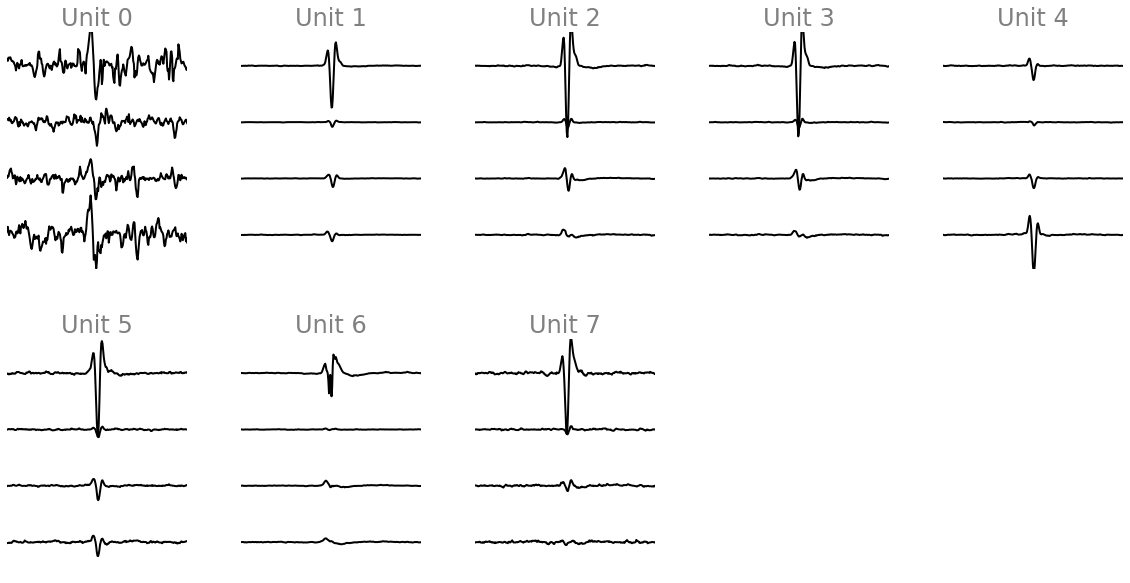

In [52]:
# Inspect waveforms

w_wf = sw.plot_unit_templates(sorting=sorting_KL, recording=r_cache, unit_ids=[0,1,2,3,4,5,6,7])

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is

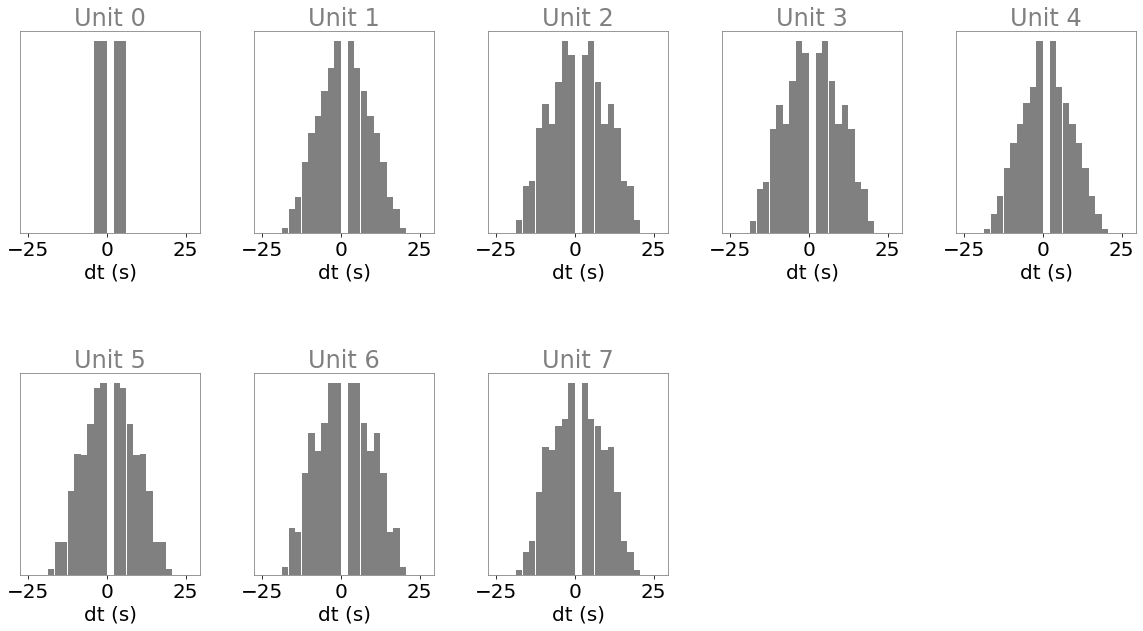

In [53]:
w_acc = sw.plot_autocorrelograms(sorting_KL, unit_ids=[0,1,2,3,4,5,6,7])

### Compute extracellular features

Extracellular features, such as peak to valley duration or full-width half maximum, are important to classify neurons into putative classes (excitatory - inhibitory). The postprocessing module of spiketoolkit allows one to compute several of these features:

In [54]:
st.postprocessing.get_template_features_list()

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['peak_to_valley',
 'halfwidth',
 'peak_trough_ratio',
 'repolarization_slope',
 'recovery_slope']

In [55]:
features = st.postprocessing.compute_unit_template_features(
    r_cache, 
    sorting_KL, 
    as_dataframe=True, 
    upsampling_factor=10
)
display(features)

/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

,peak_to_valley,halfwidth,peak_trough_ratio,repolarization_slope,recovery_slope
0,0.002742,0.002621,-0.670719,1.427086e+08,-3.507819e+07
1,0.000129,0.000100,-0.560508,3.415068e+08,-1.114879e+07
2,0.000125,0.000096,-0.651688,6.037692e+08,-2.476658e+07
3,0.000131,0.000098,-0.638373,5.687902e+08,-2.317511e+07
4,0.000129,0.000102,-0.308790,2.717318e+08,-4.220511e+06
5,0.000131,0.000106,-0.513992,4.840509e+08,-1.750573e+07
6,0.000065,0.000125,-0.803630,4.543411e+08,-1.657060e+07
7,0.000140,0.000104,-0.592804,4.690690e+08,-2.058033e+07
8,0.001088,0.002194,-0.675851,3.083532e+08,-4.354359e+06
9,0.000052,0.000065,-0.705869,6.500063e+08,-1.068880e+07


We can either compute one metric at a time, or compute a subset of metrics using the compute_quality_metrics function:

In [56]:
duration = recording.get_num_frames()
isi_violations = st.validation.compute_isi_violations(sorting_KL, duration_in_frames=duration)
print('ISI violations:', isi_violations)

snrs = st.validation.compute_snrs(sorting_KL, r_cache)
print('SNRs:', snrs)

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is

ISI violations: [   0.           18.00772984   17.56975695   17.47843135   18.79942567
   12.95014785   58.3321749    29.74372331    0.           47.24696774
   21.46099412   12.63196166   24.86428386    2.65670534   39.98653705
    0.            2.78327689    8.23786511    2.47954077    0.
    0.         1664.46858926   14.42664523   70.36446827    0.        ]
SNRs: [ 5.390336   5.5181527  9.442562   9.343866   4.833367   8.16025
  3.0658774  8.064291   8.732708   5.2863336  5.6609693  6.552438
  5.5207343 13.63063    3.9273896  3.0737364  5.4742775  3.3018587
  4.5205207  4.327707   4.8181114  5.8060265  5.852221   5.799432
  4.0707364]


In [57]:
quality_metrics = st.validation.compute_quality_metrics(
    sorting_KL, 
    r_cache, 
    metric_names=['firing_rate', 'isi_violation', 'snr'], 
    as_dataframe=True
)
display(quality_metrics)

,firing_rate,isi_violation,snr
0,0.25,0.000000,5.390336
1,169.95,0.600251,5.518153
2,56.40,0.585652,9.442562
3,51.20,0.582608,9.343866
4,70.20,0.626641,4.833367
5,10.80,0.431667,8.160250
6,62.60,1.944386,3.065877
7,9.20,0.991447,8.064291
8,0.10,0.000000,8.732708
9,13.85,1.574883,5.286334


# 6. Curation

### a) Manual curation using Phy¶

In [58]:
st.postprocessing.export_to_phy(
    r_cache, 
    sorting_KL, 
    output_folder='phy_KL',
    grouping_property='group', 
    verbose=True, 
    recompute_info=True
)

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is

Converting to Phy format
Number of chunks: 1 - Number of jobs: 1


Extracting waveforms in chunks: 100%|##########| 1/1 [00:01<00:00,  1.19s/it]


Fitting PCA of 3 dimensions on 20601 waveforms
Projecting waveforms on PC


/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:838: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(start_frame, (float, np.float)):
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extraction_tools.py:844: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(end_frame, (float, np.float))

'location' property is not available and it will be linear.
Saving files
Saved phy format to:  /mnt/d/spikeinterface/hussaini-to-nwb/phy_KL
Run:

phy template-gui  /mnt/d/spikeinterface/hussaini-to-nwb/phy_KL/params.py


In [59]:
%%capture --no-display
!phy template-gui phy_KL/params.py

/mnt/d/spikeinterface/hussaini-to-nwb/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


After curating the results we can reload it using the PhySortingExtractor:

In [60]:
sorting_KL_phy_curated = se.PhySortingExtractor('phy_KL/', exclude_cluster_groups=['noise'])

/mnt/d/spikeinterface/spikeextractors/spikeextractors/extractors/phyextractors/phyextractors.py:145: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(row[1], (int, np.int, float, np.float, str)) and len(row) == 2:
/mnt/d/spikeinterface/spikeextractors/spikeextractors/extractors/phyextractors/phyextractors.py:145: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar typ

In [61]:
print(len(sorting_KL_phy_curated.get_unit_ids()))
print(f"Unit ids after manual curation: {sorting_KL_phy_curated.get_unit_ids()}")

25
Unit ids after manual curation: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


### b) Automatic curation based on quality metrics

In [62]:
snr_thresh = 5
isi_viol_thresh = 0.5

In [63]:
sorting_auto = st.curation.threshold_isi_violations(sorting_KL, isi_viol_thresh, 'greater', duration)

In [64]:
len(sorting_auto.get_unit_ids())

6

In [65]:
sorting_auto = st.curation.threshold_snrs(sorting_auto, r_cache, snr_thresh, 'less')

In [66]:
len(sorting_auto.get_unit_ids())

3

### c) Consensus-based curation

Can we combine the output of multiple sorters to curate the spike sorting output?

To answer this question we can use the comparison module. We first compare and match the output spike trains of the different sorters, and we can then extract a new SortingExtractor with only the units in agreement.

In [67]:
mcmp = sc.compare_multiple_sorters([sorting_KL, sorting_IC], ['KL', 'IC'], spiketrain_mode='union',
                                   verbose=True)

Multicomaprison step 1: pairwise comparison
  Comparing:  KL  and  IC
Multicomaprison step 2: make graph
Multicomaprison step 3: clean graph
Removed 0 duplicate nodes
Multicomaprison step 4: extract agreement from graph


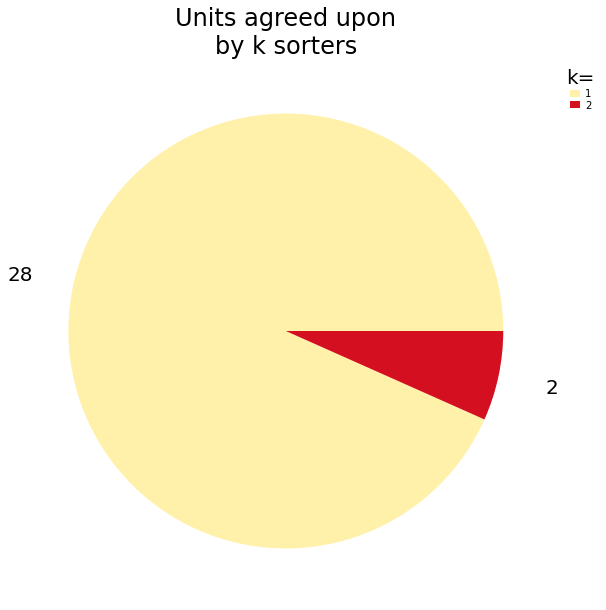

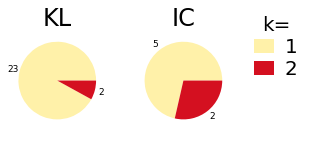

In [68]:
w = sw.plot_multicomp_agreement(mcmp)
w = sw.plot_multicomp_agreement_by_sorter(mcmp)

In [69]:
agreement_sorting = mcmp.get_agreement_sorting(minimum_agreement_count=2)

In [70]:
agreement_sorting.get_unit_ids()

[13, 20]

In [71]:
cmp_manual_agr = sc.compare_sorter_to_ground_truth(sorting_IC_phy_curated, agreement_sorting)

NameError: name 'sorting_IC_phy_curated' is not defined

In [ ]:
w_agr = sw.plot_agreement_matrix(cmp_manual_agr)

In [ ]:
st.postprocessing.export_to_phy(recording_cache, 
                                agreement_sorting, output_folder='phy_AGR',
                                grouping_property='group', verbose=True, recompute_info=True)

In [ ]:
%%capture --no-display
!phy template-gui phy_AGR/params.py

# 7. Save to / load from NWB

In [ ]:
# TODO ...

In [ ]:
metadata = {'Ecephys': {'Device': [{'name': 'open-ephys',
                                    'description': 'Open Ephys acquisition board'}]}}

In [ ]:
se.NwbRecordingExtractor.write_recording(recording_cache, 'si_tutorial.nwb', metadata=metadata)

In [ ]:
se.NwbSortingExtractor.write_sorting(sorting_IC, 'si_tutorial.nwb')

In [ ]:
recording_nwb = se.NwbRecordingExtractor('si_tutorial.nwb')
sorting_nwb = se.NwbSortingExtractor('si_tutorial.nwb')

# 8. Save to / load from TINT


In [ ]:
# TODO ...

In [ ]:
# eof